### Cross Validation and K-Nearest Neighbors

**Objectives**


- Use `KNeighborsRegressor` to model regression problems using scikitlearn
- Use `StandardScaler` to prepare data for KNN models
- Use `Pipeline` to combine the preprocessing
- Use cross validation to evaluate models


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.datasets import make_blobs
from sklearn import set_config
set_config('display')

### A Second Regression Model

In [2]:
#creating synthetic dataset
x = np.linspace(0, 5, 100)
y = 3*x + 4 + np.random.normal(scale = 3, size = len(x))
df = pd.DataFrame({'x': x, 'y': y})
df.head()

,x,y
0,0.000000,7.026062
1,0.050505,3.323073
2,0.101010,3.502014
3,0.151515,6.621440
4,0.202020,6.873484


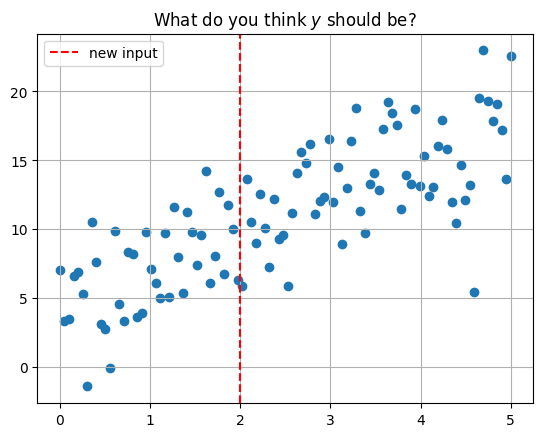

In [3]:
#plot data and new observation
plt.scatter(x, y)
plt.axvline(2, color='red', linestyle = '--', label = 'new input')
plt.grid()
plt.legend()
plt.title(r'What do you think $y$ should be?');

### KNearest Neighbors

Predict the average of the $k$ nearest neighbors.  One way to think about "nearest" is euclidean distance.  We can determine the distance between each data point and the new data point at $x = 2$ with `np.linalg.norm`.  This is a more general way of determining the euclidean distance between vectors. 

In [79]:
#compute distance from each point 
#to new observation
df['distance from x = 2'] = np.linalg.norm(df[['x']] - 2, axis = 1)
df.head()

,x,y,distance from x = 2
0,0.000000,1.112911,2.000000
1,0.050505,8.442028,1.949495
2,0.101010,7.360462,1.898990
3,0.151515,2.312211,1.848485
4,0.202020,3.587518,1.797980


In [80]:
#five nearest points
df.nsmallest(5, 'distance from x = 2')

,x,y,distance from x = 2
40,2.020202,13.137570,0.020202
39,1.969697,10.641649,0.030303
41,2.070707,14.921062,0.070707
38,1.919192,7.956040,0.080808
42,2.121212,10.442700,0.121212


In [81]:
#average of five nearest points
df.nsmallest(5, 'distance from x = 2')['y'].mean()

11.4198040942337

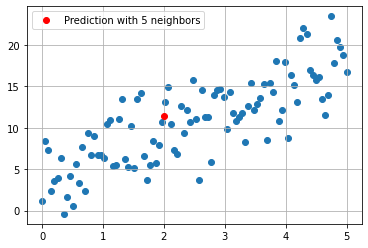

In [82]:
#predicted value with 5 neighbors
plt.scatter(x, y)
plt.plot(2, 11.4198040942337, 'ro', label = 'Prediction with 5 neighbors')
plt.grid()
plt.legend();

#### Using `sklearn`

The `KNeighborsRegressor` estimator can be used to build the KNN model.  

In [83]:
from sklearn.neighbors import KNeighborsRegressor

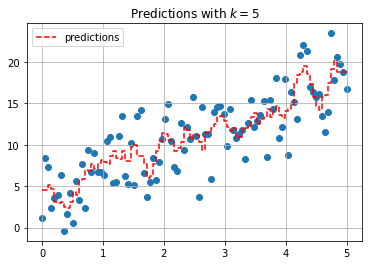

In [84]:
#predict for all data
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x.reshape(-1, 1), y)
predictions = knn.predict(x.reshape(-1, 1))
plt.scatter(x, y)
plt.step(x, predictions, '--r', label = 'predictions')
plt.grid()
plt.legend()
plt.title(r'Predictions with $k = 5$');

In [85]:
from ipywidgets import interact 
import ipywidgets as widgets

In [86]:
def knn_explorer(n_neighbors):
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(x.reshape(-1, 1), y)
    predictions = knn.predict(x.reshape(-1, 1))
    plt.scatter(x, y)
    plt.step(x, predictions, '--r', label = 'predictions')
    plt.grid()
    plt.legend()
    plt.title(f'Predictions with $k = {n_neighbors}$')
    plt.show();

In [87]:
#explore how predictions change as you change k
interact(knn_explorer, n_neighbors = widgets.IntSlider(value = 1, 
                                                       low = 1, 
                                                       high = len(x)));

interactive(children=(IntSlider(value=1, description='n_neighbors'), Output()), _dom_classes=('widget-interact…

In [88]:
KNeighborsRegressor(metric = 'manhattan')

KNeighborsRegressor(metric='manhattan')

### Comparing Models

An important idea in modeling is that we need to experiement with different versions of models and we often want to determine the "best" model based on how it predicts new data.  Below, we will walk through comparing a Linear Regression model to that of a KNN model for a regression problem.

In [4]:
from sklearn.datasets import load_diabetes

In [5]:
diabetes = load_diabetes(as_frame=True).frame

In [6]:
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [7]:
#Create feature matrix (using all features) and target
X = ''
y = ''

In [8]:
#train/test split


In [ ]:
#linear regression model
model1 = ''
#fit it


In [9]:
#predictions
train_preds = ''
test_preds = ''

In [10]:
#mse of train


In [11]:
#mse of test


**Polynomial Model**

Now, we compare this model to a quadratic regression model using `PolynomialFeatures`.

In [12]:
polyfeats = PolynomialFeatures(degree = 2)

In [13]:
#create new version of datasets
X_train_poly = ''
X_test_poly = ''

In [14]:
#model
poly_model = ''
#fit on train


In [15]:
#mse of train


In [16]:
#mse of test


In [17]:
#which model was better -- quadratic or linear?


### Cross Validation

"*Cross-validation is a resampling method that uses different portions of the data to test and train a model on different iterations. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice."* -- [Wikipedia](https://en.wikipedia.org/wiki/Cross-validation_(statistics))

In short, this is a way for us to better understand the quality of the predictions made by our estimator. 

#### K-Fold Cross Validation

![](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [89]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
#linear regression model
lr = LinearRegression()

In [92]:
#knn model
knn = KNeighborsRegressor()

In [93]:
#cross validate linear model
cross_val_score(lr, x.reshape(-1, 1), y)

array([ 0.05002084, -0.13676708, -0.01574163, -0.03091175,  0.02478929])

In [94]:
#cross validate knn model
cross_val_score(knn, x.reshape(-1, 1), y)

array([-1.01619217, -0.29881553, -0.46458949,  0.09059758, -0.39398357])

#### Exercise: Predicting Bike Riders

Below a dataset is loaded using the `fetch_openml` function.  The objective is to predict rider count.

In [95]:
from sklearn.datasets import fetch_openml

In [96]:
bikes = fetch_openml(data_id = 44063)

In [97]:
print(bikes.DESCR)

Dataset used in the tabular data benchmark https://github.com/LeoGrin/tabular-benchmark,  
                                  transformed in the same way. This dataset belongs to the "regression on categorical and
                                  numerical features" benchmark. Original description: 
 
Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the researc

In [98]:
bikes.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   year        17379 non-null  category
 2   month       17379 non-null  float64 
 3   hour        17379 non-null  float64 
 4   holiday     17379 non-null  category
 5   workingday  17379 non-null  category
 6   weather     17379 non-null  category
 7   temp        17379 non-null  float64 
 8   feel_temp   17379 non-null  float64 
 9   humidity    17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  count       17379 non-null  float64 
dtypes: category(5), float64(7)
memory usage: 1.0 MB


In [99]:
data = bikes.frame

In [100]:
data.head()

,season,year,month,hour,holiday,workingday,weather,temp,feel_temp,humidity,windspeed,count
0,1,0,1.0,0.0,0,0,0,9.84,14.395,0.81,0.0,16.0
1,1,0,1.0,1.0,0,0,0,9.02,13.635,0.80,0.0,40.0
2,1,0,1.0,2.0,0,0,0,9.02,13.635,0.80,0.0,32.0
3,1,0,1.0,3.0,0,0,0,9.84,14.395,0.75,0.0,13.0
4,1,0,1.0,4.0,0,0,0,9.84,14.395,0.75,0.0,1.0


In [101]:
data['holiday'].value_counts()

0    16879
1      500
Name: holiday, dtype: int64

In [102]:
data['weather'].value_counts()

0    11413
2     4544
3     1419
1        3
Name: weather, dtype: int64

In [103]:
data['holiday'].value_counts()

0    16879
1      500
Name: holiday, dtype: int64

In [104]:
data['season'].value_counts()

0    4496
2    4409
1    4242
3    4232
Name: season, dtype: int64

In [105]:
data['year'].value_counts()

1    8734
0    8645
Name: year, dtype: int64

In [106]:
#split data
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='count'), data['count'], random_state=42)

In [107]:
X_train.head(2)

,season,year,month,hour,holiday,workingday,weather,temp,feel_temp,humidity,windspeed
1945,2,0,3.0,20.0,0,0,2,11.48,13.635,0.45,16.9979
13426,0,1,7.0,15.0,0,1,3,37.72,42.425,0.35,23.9994


In [108]:
#encode categorical features
encoder = make_column_transformer((OneHotEncoder(drop = 'first'), ['season', 'weather']),
                                 remainder = 'passthrough')

In [109]:
#encode categorical features and scale others
encoder = make_column_transformer((OneHotEncoder(drop = 'first'), ['season', 'weather']),
                                 remainder = StandardScaler())

In [110]:
#fit and transform training data
X_train_transformed = encoder.fit_transform(X_train)

In [111]:
#transform test data
X_test_transformed = encoder.transform(X_test)

In [112]:
#linear regression model
lr = LinearRegression()

In [114]:
#cross validate
cross_val_score(lr, X_train_transformed, y_train, cv = 10)

array([0.4179818 , 0.39728929, 0.36351367, 0.38537894, 0.4039477 ,
       0.42911072, 0.3830556 , 0.38717789, 0.39539381, 0.41339759])

In [115]:
#knn model with 5 neighbors
knn = KNeighborsRegressor()

In [116]:
#cross validate
cross_val_score(knn, X_train_transformed, y_train, cv = 10)

array([0.69359044, 0.71116924, 0.66795855, 0.65825036, 0.65512769,
       0.68970725, 0.69961195, 0.66875247, 0.68285728, 0.66897624])

In [117]:
knn.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [118]:
knn.score(X_test_transformed, y_test)

0.6957260397958962

#### `Pipeline`

The `Pipeline` class allows us to combine all the preprocessing and modeling steps together in a single object.  Once created, the `Pipeline` works just like an estimator with a `.fit` and a `.predict` and `.score` method.  To access individual steps in the pipeline use the `.named_steps` attribute of the pipeline.

In [119]:
from sklearn.pipeline import Pipeline

In [121]:
#instantiate pipeline
pipe = Pipeline([('ohe', encoder),
                ('lr', LinearRegression())])

In [122]:
#fit on train
pipe.fit(X_train, y_train)

Pipeline(steps=[('ohe',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['season', 'weather'])])),
                ('lr', LinearRegression())])

In [123]:
#score on test
pipe.score(X_test, y_test)

0.3952561824510502

In [124]:
#cross validate
cross_val_score(pipe, X_train, y_train, cv = 10)

array([0.4179818 , 0.39728929, 0.36351367, 0.38537894, 0.4039477 ,
       0.42911072, 0.3830556 , 0.38717789, 0.39539381, 0.41339759])

In [125]:
#look at coefficients
pipe.named_steps

{'ohe': ColumnTransformer(remainder=StandardScaler(),
                   transformers=[('onehotencoder', OneHotEncoder(drop='first'),
                                  ['season', 'weather'])]),
 'lr': LinearRegression()}

In [127]:
pipe.named_steps['lr'].coef_

array([  3.15346589,  24.76957468,  68.10547059,  40.44824255,
         8.05398136, -25.02760699,  40.4935775 ,   0.24820152,
        52.18078251,  -4.99252765,   1.04700581,  49.22676167,
        18.03062066, -37.41876958,   3.48330617])

In [ ]:
make_column_transformer()

In [130]:
pipe.named_steps['ohe'].get_feature_names_out()

array(['onehotencoder__season_1', 'onehotencoder__season_2',
       'onehotencoder__season_3', 'onehotencoder__weather_1',
       'onehotencoder__weather_2', 'onehotencoder__weather_3',
       'remainder__year', 'remainder__month', 'remainder__hour',
       'remainder__holiday', 'remainder__workingday', 'remainder__temp',
       'remainder__feel_temp', 'remainder__humidity',
       'remainder__windspeed'], dtype=object)

#### Other Uses of KNN

Another place the `KNeighborsRegressor` can be used is to impute missing data.  Here, we use the nearest datapoints to fill in missing values.  Scikitlearn has a `KNNImputer` that will fill in missing values based on the average of $n$ neighbors averages.  

In [131]:
from sklearn.impute import KNNImputer

In [132]:
titanic = sns.load_dataset('titanic')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [133]:
# instantiate
knn_imputer = KNNImputer()

In [136]:
# fit and transform
titanic['age'] = knn_imputer.fit_transform(titanic[['age']])

In [137]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [164]:
# encoder
encoder = make_column_transformer((KNNImputer(), ['age']),
                                (OneHotEncoder(), ['who', 'embarked', 'class', 
                                                   'sex', 'embark_town', 'alive']),
                                 remainder = 'passthrough')

In [165]:
# pipeline
pipe = Pipeline([('imputer', encoder),
                ('knn', KNeighborsRegressor())])

In [166]:
# fit on train
X = titanic.drop(columns=['survived', 'deck'])
y = titanic['survived']
pipe.fit(X, y)

Pipeline(steps=[('imputer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('knnimputer', KNNImputer(),
                                                  ['age']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['who', 'embarked', 'class',
                                                   'sex', 'embark_town',
                                                   'alive'])])),
                ('knn', KNeighborsRegressor())])

In [167]:
# score on train and test
pipe.score(X, y)

0.642950819672131

In [168]:
cross_val_score(pipe, X, y)

array([0.16466667, 0.32632656, 0.31744183, 0.39640461, 0.47816149])